There are 10 possible arcs in total for each step, and we label them as such (I couldn't get graphviz to output curved edges, so the arcs are represented by line segments below):

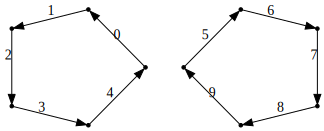

Each arc can transition into one of two arcs, given by the following transition graph:

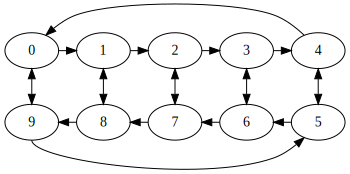

Observe that to form a closed path, there arcs 0, 1, 2, 3, 4 must appear the same number of times (cancel out), and arcs 5, 6, 7, 8, 9 must appear the same number of times. A state is determined by the counts of arcs 0 to 9 (regardless of order) and the final arc, and we can further normalize the aforementioned states with an additional cycle counter, s.t.

$$
\begin{gathered}
\mathrm{state}(\{c_i\},\, \mathrm{f.a.}) \mapsto 
\mathrm{normalized\ state}(\{c_0-C_0, c_1-C_0, \dots, c_4-C_0, c_5-C_1, c_6-C_1, \dots, c_9-C_1\},\, C = C_0+C_1,\, \mathrm{f.a.}),\\
C_0 = \min(c_0, c_1, \dots, c_4),\ C_1 = \min(c_5, c_6, \dots, c_9).
\end{gathered}
$$

where $\{c_i\}$ stand for arc counts, $\mathrm{f.a.}$ stands for final arc, and $C$ stands for the cycle count. Also note that any state with

$$C + \max(c_0, c_1, \dots, c_4) + \max(c_5, c_6, \dots, c_9) > N/5$$

cannot possibly cancel out at the end of $N$ steps.

Given the above analysis we can quite easily do a tree-pruned BFS with memoization. The actual state representation is somewhat interesting: given the size of the problem (70 steps total), each arc count $\ge 14$ can fit into 4 bits, so the entire state (ten arc counts, one cycle count, plus the final arc) fits into a 64-bit word. So the entire state can be manipulated through bitwise ops. In fact in my implementation I wrote all manipulations in preprocessor macros.

My C++ implementation finishes in 0.12s.